In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
# from sklearn.feature_selection import
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import Normalizer, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.metrics import mutual_info_score, mean_squared_error
from IPython.display import display

In [6]:
# importing train_dfset
train_df = pd.read_csv("/home/aja/Documents/ML/dataset/house_price/house_price_train.csv")
test_df = pd.read_csv("/home/aja/Documents/ML/dataset/house_price/house_price_test.csv")

In [7]:
# looking at the train_df
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
# summary of numeric train_df
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [9]:
# looking at train_df types of each column
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
# checking for null values
train_df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [11]:
# checking for duplicates
train_df.duplicated().sum()  # got zero duplicates

0

In [12]:
train_df["Id"] = [str(value) for value in train_df["Id"]]
train_df["Id"]

0          1
1          2
2          3
3          4
4          5
        ... 
1455    1456
1456    1457
1457    1458
1458    1459
1459    1460
Name: Id, Length: 1460, dtype: object

<Axes: xlabel='SalePrice', ylabel='Count'>

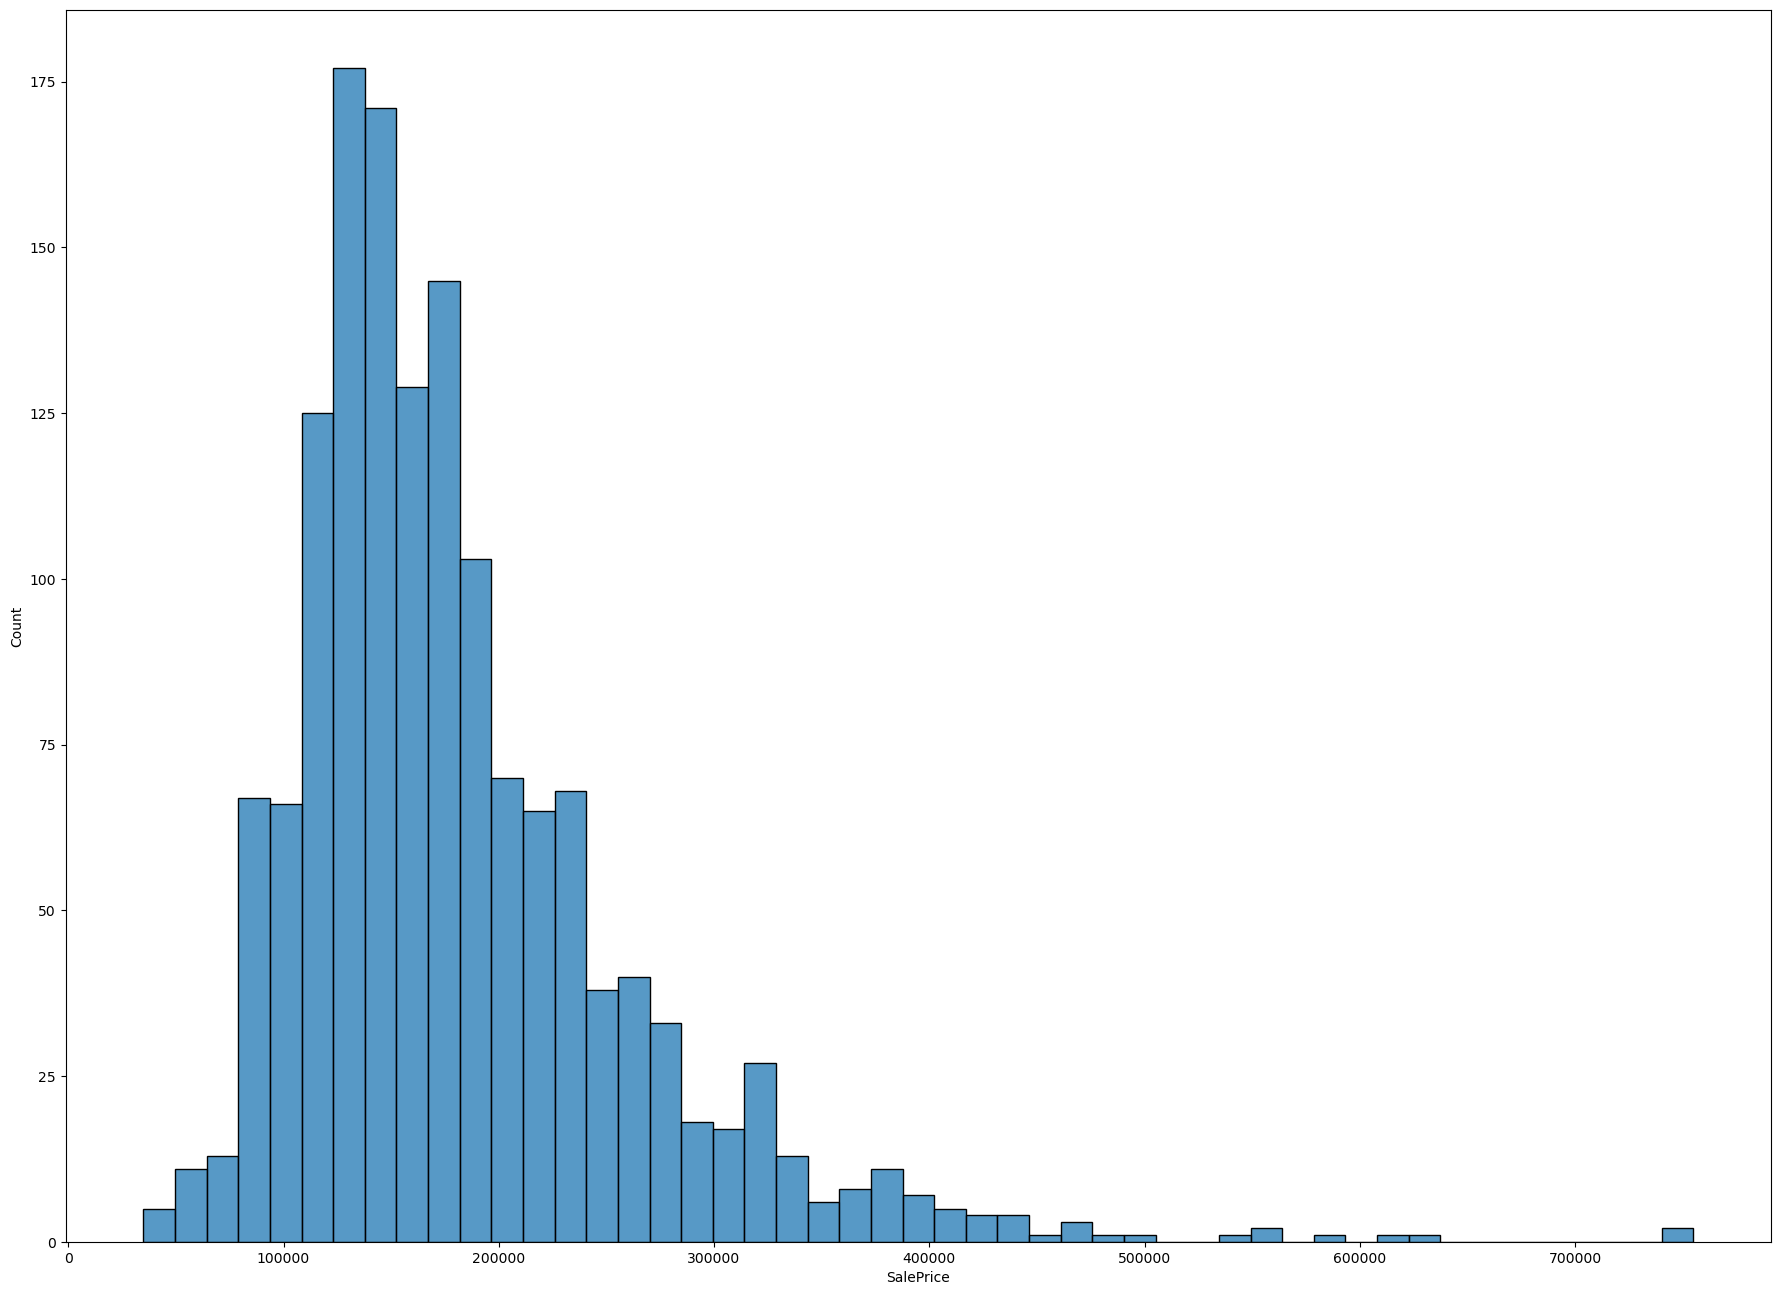

In [13]:
# distribution checking
plt.figure(figsize=(22, 16))
sns.histplot(train_df.SalePrice)

In [14]:
# sorting out categorical features from numeric features
cat_features = [col for col in train_df.columns if train_df[col].dtypes == "object" and train_df[col].nunique() < 10]
other_features = [col for col in train_df.columns if train_df[col].dtypes == "object" and train_df[col].nunique() >= 10]
numeric_features = [col for col in train_df.columns if train_df[col].dtypes in ["int64", "float64"] and train_df[col].nunique() < 10]
other_num_features = [col for col in train_df.columns if train_df[col].dtypes in ["int64", "float64"] and train_df[col].nunique() >= 10]

In [15]:
# cleaning numeric features
train_df[other_num_features] = train_df[other_num_features].replace(0, np.nan)

In [16]:
train_df[other_num_features]

,MSSubClass,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,SalePrice
0,60,65.0,8450,7,2003,2003,196.0,706.0,NaN,150.0,...,2003.0,548.0,NaN,61.0,NaN,NaN,NaN,NaN,2,208500
1,20,80.0,9600,6,1976,1976,NaN,978.0,NaN,284.0,...,1976.0,460.0,298.0,NaN,NaN,NaN,NaN,NaN,5,181500
2,60,68.0,11250,7,2001,2002,162.0,486.0,NaN,434.0,...,2001.0,608.0,NaN,42.0,NaN,NaN,NaN,NaN,9,223500
3,70,60.0,9550,7,1915,1970,NaN,216.0,NaN,540.0,...,1998.0,642.0,NaN,35.0,272.0,NaN,NaN,NaN,2,140000
4,60,84.0,14260,8,2000,2000,350.0,655.0,NaN,490.0,...,2000.0,836.0,192.0,84.0,NaN,NaN,NaN,NaN,12,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,1999,2000,NaN,NaN,NaN,953.0,...,1999.0,460.0,NaN,40.0,NaN,NaN,NaN,NaN,8,175000
1456,20,85.0,13175,6,1978,1988,119.0,790.0,163.0,589.0,...,1978.0,500.0,349.0,NaN,NaN,NaN,NaN,NaN,2,210000
1457,70,66.0,9042,7,1941,2006,NaN,275.0,NaN,877.0,...,1941.0,252.0,NaN,60.0,NaN,NaN,NaN,2500.0,5,266500
1458,20,68.0,9717,5,1950,1996,NaN,49.0,1029.0,NaN,...,1950.0,240.0,366.0,NaN,112.0,NaN,NaN,NaN,4,142125


In [17]:
# calculating the % of null values
perc = [col for col in train_df.columns if (((train_df[col].isna().sum()/len(train_df))*100) > 20)]
train_df.drop(perc, axis=1, inplace=True)  # dropping all columns with more than 20% null values

In [18]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,GarageArea,GarageQual,GarageCond,PavedDrive,PoolArea,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,548.0,TA,TA,Y,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,460.0,TA,TA,Y,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,608.0,TA,TA,Y,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,642.0,TA,TA,Y,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,836.0,TA,TA,Y,0,12,2008,WD,Normal,250000


In [19]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 65 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   object 
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [20]:
# separation into features and label
X = train_df.drop("SalePrice", axis=1)
y = train_df.SalePrice

In [21]:
cat_features = [col for col in X.columns if X[col].dtypes == "object" and X[col].nunique() < 10]
other_features = [col for col in X.columns if X[col].dtypes == "object" and X[col].nunique() >= 10]
numeric_features = [col for col in X.columns if X[col].dtypes in ["int64", "float64"]]

In [22]:
# dealing with missing values
X[numeric_features] = IterativeImputer(estimator=DecisionTreeRegressor(random_state=1), max_iter=5).fit_transform(X[numeric_features])
X[cat_features] = SimpleImputer(strategy="most_frequent").fit_transform(X[cat_features])
X[other_features] = SimpleImputer(strategy="most_frequent").fit_transform(X[other_features])

/home/aja/anaconda3/lib/python3.11/site-packages/sklearn/impute/_iterative.py:800: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [23]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 64 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   object 
 1   MSSubClass     1460 non-null   float64
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   float64
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   float64
 17  OverallCond    1460 non-null   float64
 18  YearBuil

In [24]:
def rates(X, y, columns):
    data = pd.concat([X, y], axis=1)
    global_mean = round(data["SalePrice"].mean(), 3)
    for col in columns:
        df_group = data.groupby(by=col).SalePrice.agg(["mean"])
        df_group["diff"] = df_group["mean"] - global_mean
        df_group["rate"] = df_group["mean"] / global_mean
        display(df_group)

In [25]:
rates(X, y, cat_features)

,mean,diff,rate
MSZoning,,,
C (all),74528.000000,-106393.196000,0.411936
FV,214014.061538,33092.865538,1.182913
RH,131558.375000,-49362.821000,0.727158
RL,191004.994787,10083.798787,1.055736
RM,126316.830275,-54604.365725,0.698187


,mean,diff,rate
Street,,,
Grvl,130190.500000,-50730.696000,0.719598
Pave,181130.538514,209.342514,1.001157


,mean,diff,rate
LotShape,,,
IR1,206101.665289,25180.469289,1.139179
IR2,239833.365854,58912.169854,1.325623
IR3,216036.500000,35115.304000,1.194092
Reg,164754.818378,-16166.377622,0.910644


,mean,diff,rate
LandContour,,,
Bnk,143104.079365,-37817.116635,0.790975
HLS,231533.940000,50612.744000,1.279750
Low,203661.111111,22739.915111,1.125690
Lvl,180183.746758,-737.449242,0.995924


,mean,diff,rate
Utilities,,,
AllPub,180950.95682,29.76082,1.000164
NoSeWa,137500.00000,-43421.19600,0.759999


,mean,diff,rate
LotConfig,,,
Corner,181623.425856,702.229856,1.003881
CulDSac,223854.617021,42933.421021,1.237305
FR2,177934.574468,-2986.621532,0.983492
FR3,208475.000000,27553.804000,1.152297
Inside,176938.047529,-3983.148471,0.977984


,mean,diff,rate
LandSlope,,,
Gtl,179956.799566,-964.396434,0.994670
Mod,196734.138462,15812.942462,1.087402
Sev,204379.230769,23458.034769,1.129659


,mean,diff,rate
Condition1,,,
Artery,135091.666667,-45829.529333,0.746688
Feedr,142475.481481,-38445.714519,0.787500
Norm,184495.492063,3574.296063,1.019756
PosA,225875.000000,44953.804000,1.248472
PosN,215184.210526,34263.014526,1.189381
RRAe,138400.000000,-42521.196000,0.764974
RRAn,184396.615385,3475.419385,1.019210
RRNe,190750.000000,9828.804000,1.054326
RRNn,212400.000000,31478.804000,1.173992


,mean,diff,rate
Condition2,,,
Artery,106500.000000,-74421.196000,0.588654
Feedr,121166.666667,-59754.529333,0.669721
Norm,181169.405536,248.209536,1.001372
PosA,325000.000000,144078.804000,1.796362
PosN,284875.000000,103953.804000,1.574581
RRAe,190000.000000,9078.804000,1.050181
RRAn,136905.000000,-44016.196000,0.756711
RRNn,96750.000000,-84171.196000,0.534763


,mean,diff,rate
BldgType,,,
1Fam,185763.807377,4842.611377,1.026766
2fmCon,128432.258065,-52488.937935,0.709880
Duplex,133541.076923,-47380.119077,0.738117
Twnhs,135911.627907,-45009.568093,0.751220
TwnhsE,181959.342105,1038.146105,1.005738


,mean,diff,rate
HouseStyle,,,
1.5Fin,143116.740260,-37804.455740,0.791045
1.5Unf,110150.000000,-70771.196000,0.608829
1Story,175985.477961,-4935.718039,0.972719
2.5Fin,220000.000000,39078.804000,1.215999
2.5Unf,157354.545455,-23566.650545,0.869741
2Story,210051.764045,29130.568045,1.161012
SFoyer,135074.486486,-45846.709514,0.746593
SLvl,166703.384615,-14217.811385,0.921414


,mean,diff,rate
RoofStyle,,,
Flat,194690.000000,13768.804000,1.076104
Gable,171483.956179,-9437.239821,0.947838
Gambrel,148909.090909,-32012.105091,0.823061
Hip,218876.933566,37955.737566,1.209792
Mansard,180568.428571,-352.767429,0.998050
Shed,225000.000000,44078.804000,1.243635


,mean,diff,rate
RoofMatl,,,
ClyTile,160000.000000,-20921.196000,0.884363
CompShg,179803.679219,-1117.516781,0.993823
Membran,241500.000000,60578.804000,1.334835
Metal,180000.000000,-921.196000,0.994908
Roll,137000.000000,-43921.196000,0.757236
Tar&Grv,185406.363636,4485.167636,1.024791
WdShake,241400.000000,60478.804000,1.334283
WdShngl,390250.000000,209328.804000,2.157016


,mean,diff,rate
MasVnrType,,,
BrkCmn,146318.066667,-34603.129333,0.808739
BrkFace,204691.871910,23770.675910,1.131387
None,156958.243119,-23962.952881,0.867550
Stone,265583.625000,84662.429000,1.467952


,mean,diff,rate
ExterQual,,,
Ex,367360.961538,186439.765538,2.030503
Fa,87985.214286,-92935.981714,0.486318
Gd,231633.510246,50712.314246,1.280301
TA,144341.313466,-36579.882534,0.797813


,mean,diff,rate
ExterCond,,,
Ex,201333.333333,20412.137333,1.112823
Fa,102595.142857,-78326.053143,0.567071
Gd,168897.568493,-12023.627507,0.933542
Po,76500.000000,-104421.196000,0.422836
TA,184034.896256,3113.700256,1.017210


,mean,diff,rate
Foundation,,,
BrkTil,132291.075342,-48630.120658,0.731208
CBlock,149805.714511,-31115.481489,0.828016
PConc,225230.442040,44309.246040,1.244909
Slab,107365.625000,-73555.571000,0.593439
Stone,165959.166667,-14962.029333,0.917301
Wood,185666.666667,4745.470667,1.026229


,mean,diff,rate
BsmtQual,,,
Ex,327041.041322,146119.845322,1.807644
Fa,115692.028571,-65229.167429,0.639461
Gd,202688.478964,21767.282964,1.120314
TA,138866.295918,-42054.900082,0.767551


,mean,diff,rate
BsmtCond,,,
Fa,121809.533333,-59111.662667,0.673274
Gd,213599.907692,32678.711692,1.180624
Po,64000.000000,-116921.196000,0.353745
TA,181492.227745,571.031745,1.003156


,mean,diff,rate
BsmtExposure,,,
Av,206643.420814,25722.224814,1.142174
Gd,257689.805970,76768.609970,1.424321
Mn,192789.657895,11868.461895,1.065600
No,163439.248234,-17481.947766,0.903373


,mean,diff,rate
BsmtFinType1,,,
ALQ,161573.068182,-19348.127818,0.893058
BLQ,149493.655405,-31427.540595,0.826292
GLQ,235413.720096,54492.524096,1.301195
LwQ,151852.702703,-29068.493297,0.839331
Rec,146889.248120,-34031.947880,0.811896
Unf,165519.282655,-15401.913345,0.914869


,mean,diff,rate
BsmtFinType2,,,
ALQ,209942.105263,29020.909263,1.160406
BLQ,151101.000000,-29820.196000,0.835176
GLQ,180982.142857,60.946857,1.000337
LwQ,164364.130435,-16557.065565,0.908485
Rec,164917.129630,-16004.066370,0.911541
Unf,182511.350850,1590.154850,1.008789


,mean,diff,rate
Heating,,,
Floor,72500.000000,-108421.196000,0.400727
GasA,182021.195378,1099.999378,1.006080
GasW,166632.166667,-14289.029333,0.921021
Grav,75271.428571,-105649.767429,0.416045
OthW,125750.000000,-55171.196000,0.695054
Wall,92100.000000,-88821.196000,0.509061


,mean,diff,rate
HeatingQC,,,
Ex,214914.429150,33993.233150,1.187890
Fa,123919.489796,-57001.706204,0.684936
Gd,156858.871369,-24062.324631,0.867001
Po,87000.000000,-93921.196000,0.480872
TA,142362.876168,-38558.319832,0.786878


,mean,diff,rate
CentralAir,,,
N,105264.073684,-75657.122316,0.581823
Y,186186.709890,5265.513890,1.029104


,mean,diff,rate
Electrical,,,
FuseA,122196.893617,-58724.302383,0.675415
FuseF,107675.444444,-73245.751556,0.595151
FuseP,97333.333333,-83587.862667,0.537987
Mix,67000.000000,-113921.196000,0.370327
SBrkr,186810.637453,5889.441453,1.032553


,mean,diff,rate
KitchenQual,,,
Ex,328554.670000,147633.474000,1.816010
Fa,105565.205128,-75355.990872,0.583487
Gd,212116.023891,31194.827891,1.172422
TA,139962.511565,-40958.684435,0.773610


,mean,diff,rate
Functional,,,
Maj1,153948.142857,-26973.053143,0.850913
Maj2,85800.000000,-95121.196000,0.474240
Min1,146385.483871,-34535.712129,0.809112
Min2,144240.647059,-36680.548941,0.797257
Mod,168393.333333,-12527.862667,0.930755
Sev,129000.000000,-51921.196000,0.713018
Typ,183429.147059,2507.951059,1.013862


,mean,diff,rate
GarageType,,,
2Types,151283.333333,-29637.862667,0.836184
Attchd,194411.473186,13490.277186,1.074564
Basment,160570.684211,-20350.511789,0.887517
BuiltIn,254751.738636,73830.542636,1.408081
CarPort,109962.111111,-70959.084889,0.607790
Detchd,134091.162791,-46830.033209,0.741158


,mean,diff,rate
GarageFinish,,,
Fin,240052.690341,59131.494341,1.326836
RFn,202068.869668,21147.673668,1.116889
Unf,137570.460641,-43350.735359,0.760389


,mean,diff,rate
GarageQual,,,
Ex,241000.000000,60078.804000,1.332072
Fa,123573.354167,-57347.841833,0.683023
Gd,215860.714286,34939.518286,1.193120
Po,100166.666667,-80754.529333,0.553648
TA,182591.864224,1670.668224,1.009234


,mean,diff,rate
GarageCond,,,
Ex,124000.000000,-56921.196000,0.685381
Fa,114654.028571,-66267.167429,0.633724
Gd,179930.000000,-991.196000,0.994521
Po,108500.000000,-72421.196000,0.599709
TA,183017.189055,2095.993055,1.011585


,mean,diff,rate
PavedDrive,,,
N,115039.122222,-65882.073778,0.635852
P,132330.000000,-48591.196000,0.731423
Y,186433.973881,5512.777881,1.030471


,mean,diff,rate
SaleType,,,
COD,143973.255814,-36947.940186,0.795779
CWD,210600.000000,29678.804000,1.164043
Con,269600.000000,88678.804000,1.490152
ConLD,138780.888889,-42140.307111,0.767079
ConLI,200390.000000,19468.804000,1.107609
ConLw,143700.000000,-37221.196000,0.794268
New,274945.418033,94024.222033,1.519697
Oth,119850.000000,-61071.196000,0.662443
WD,173401.836622,-7519.359378,0.958438


,mean,diff,rate
SaleCondition,,,
Abnorml,146526.623762,-34394.572238,0.809892
AdjLand,104125.000000,-76796.196000,0.575527
Alloca,167377.416667,-13543.779333,0.925140
Family,149600.000000,-31321.196000,0.826879
Normal,175202.219533,-5718.976467,0.968390
Partial,272291.752000,91370.556000,1.505030


In [26]:
def calculate_mi_score(X):
    return mutual_info_score(X, y)

In [27]:
df_mi = pd.concat([X[cat_features], X[other_features]], axis=1).apply(calculate_mi_score)
df_mi = df_mi.sort_values(ascending=False).to_frame(name="Mutual Information")
df_mi

,Mutual Information
Id,6.132837
Neighborhood,2.003888
Exterior2nd,1.172542
Exterior1st,1.116941
BsmtFinType1,0.893886
HouseStyle,0.721220
KitchenQual,0.676428
BsmtQual,0.673886
GarageFinish,0.652459
Foundation,0.637097


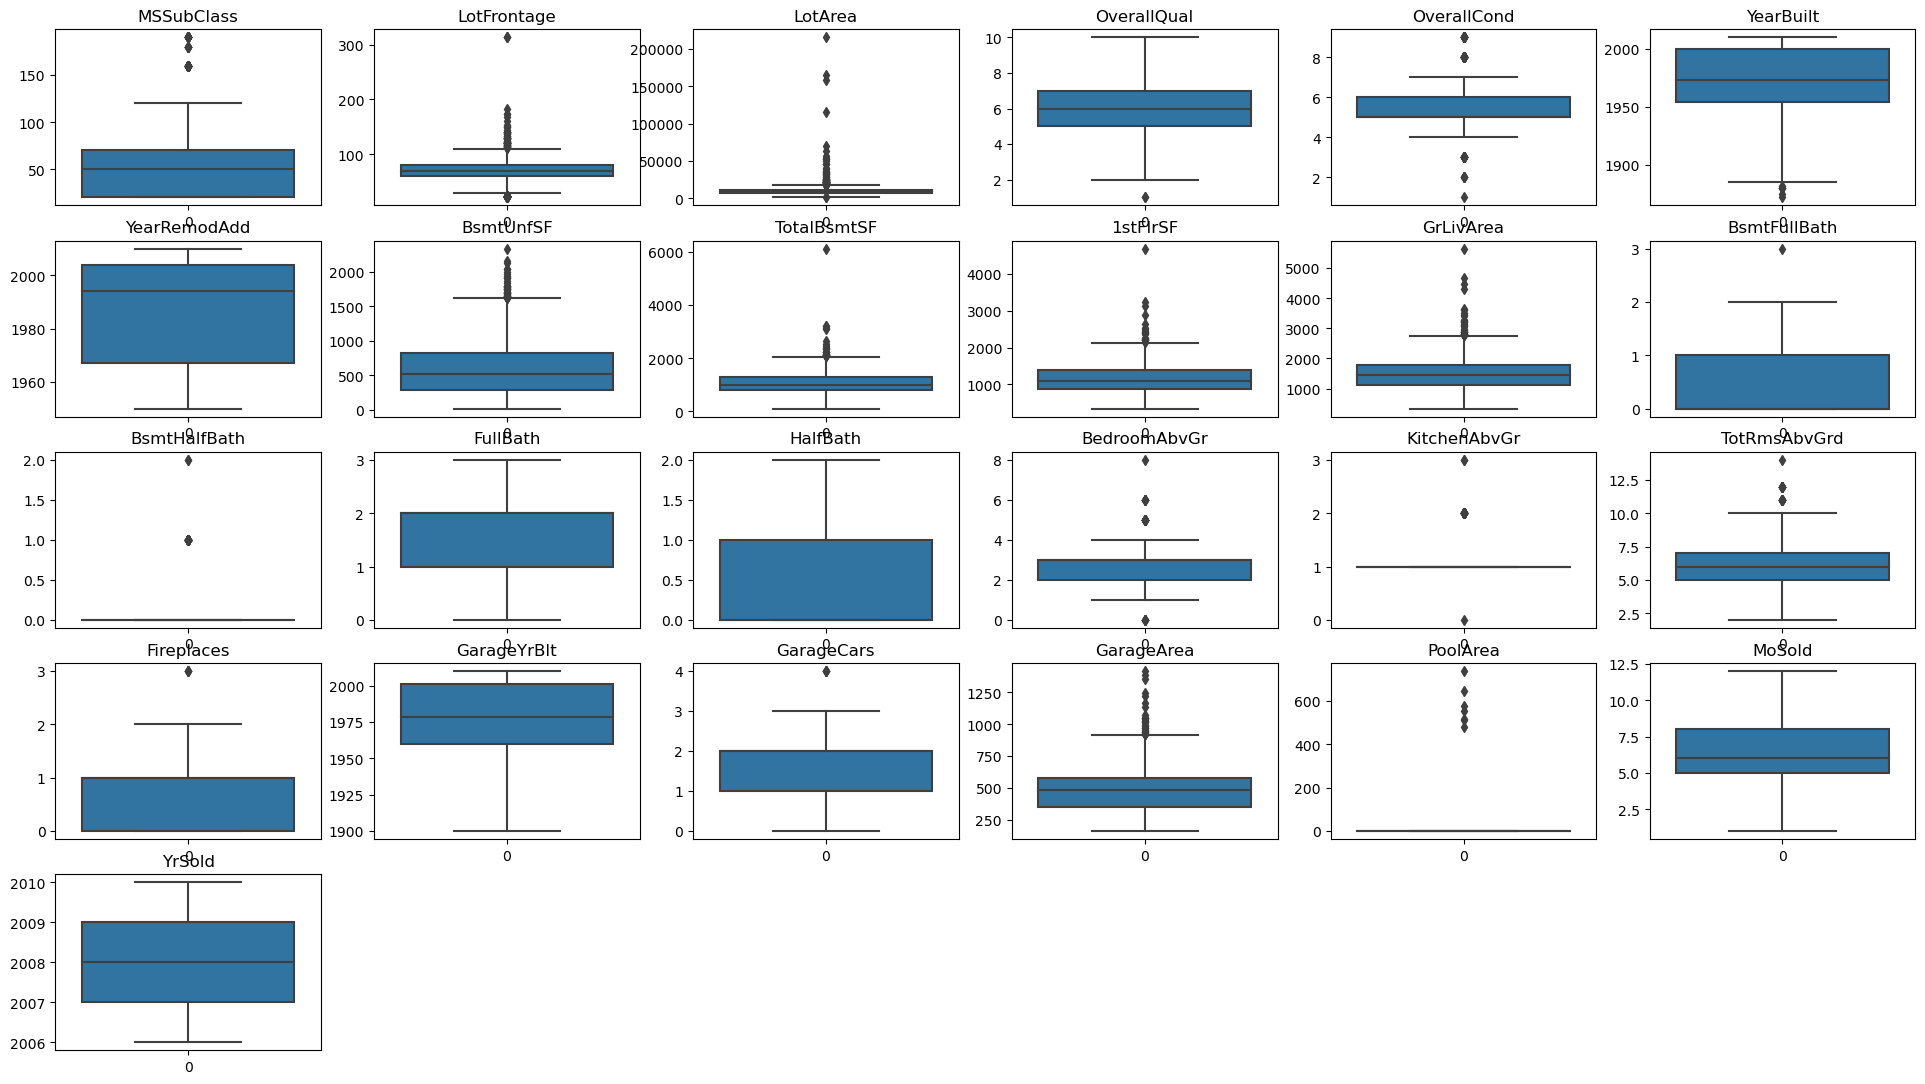

In [28]:
ind = 0
plt.figure(figsize=(24,16))
for i in X[numeric_features]:
    ind += 1
    plt.subplot(6,6,ind)
    plt.title(i)
    sns.boxplot(X[i])

In [29]:
features = ["BsmtUnfSF", "TotalBsmtSF","1stFlrSF", "GrLivArea", "BedroomAbvGr","LotArea","LotFrontage","MSSubClass","TotRmsAbvGrd","GarageArea"]

In [30]:
for i in features:
    X[i] = X[i].clip(lower=X[i].quantile(0.05),upper=X[i].quantile(0.95))
    
X["YearBuilt"] = X["YearBuilt"].clip(lower=X["YearBuilt"].quantile(0.10))

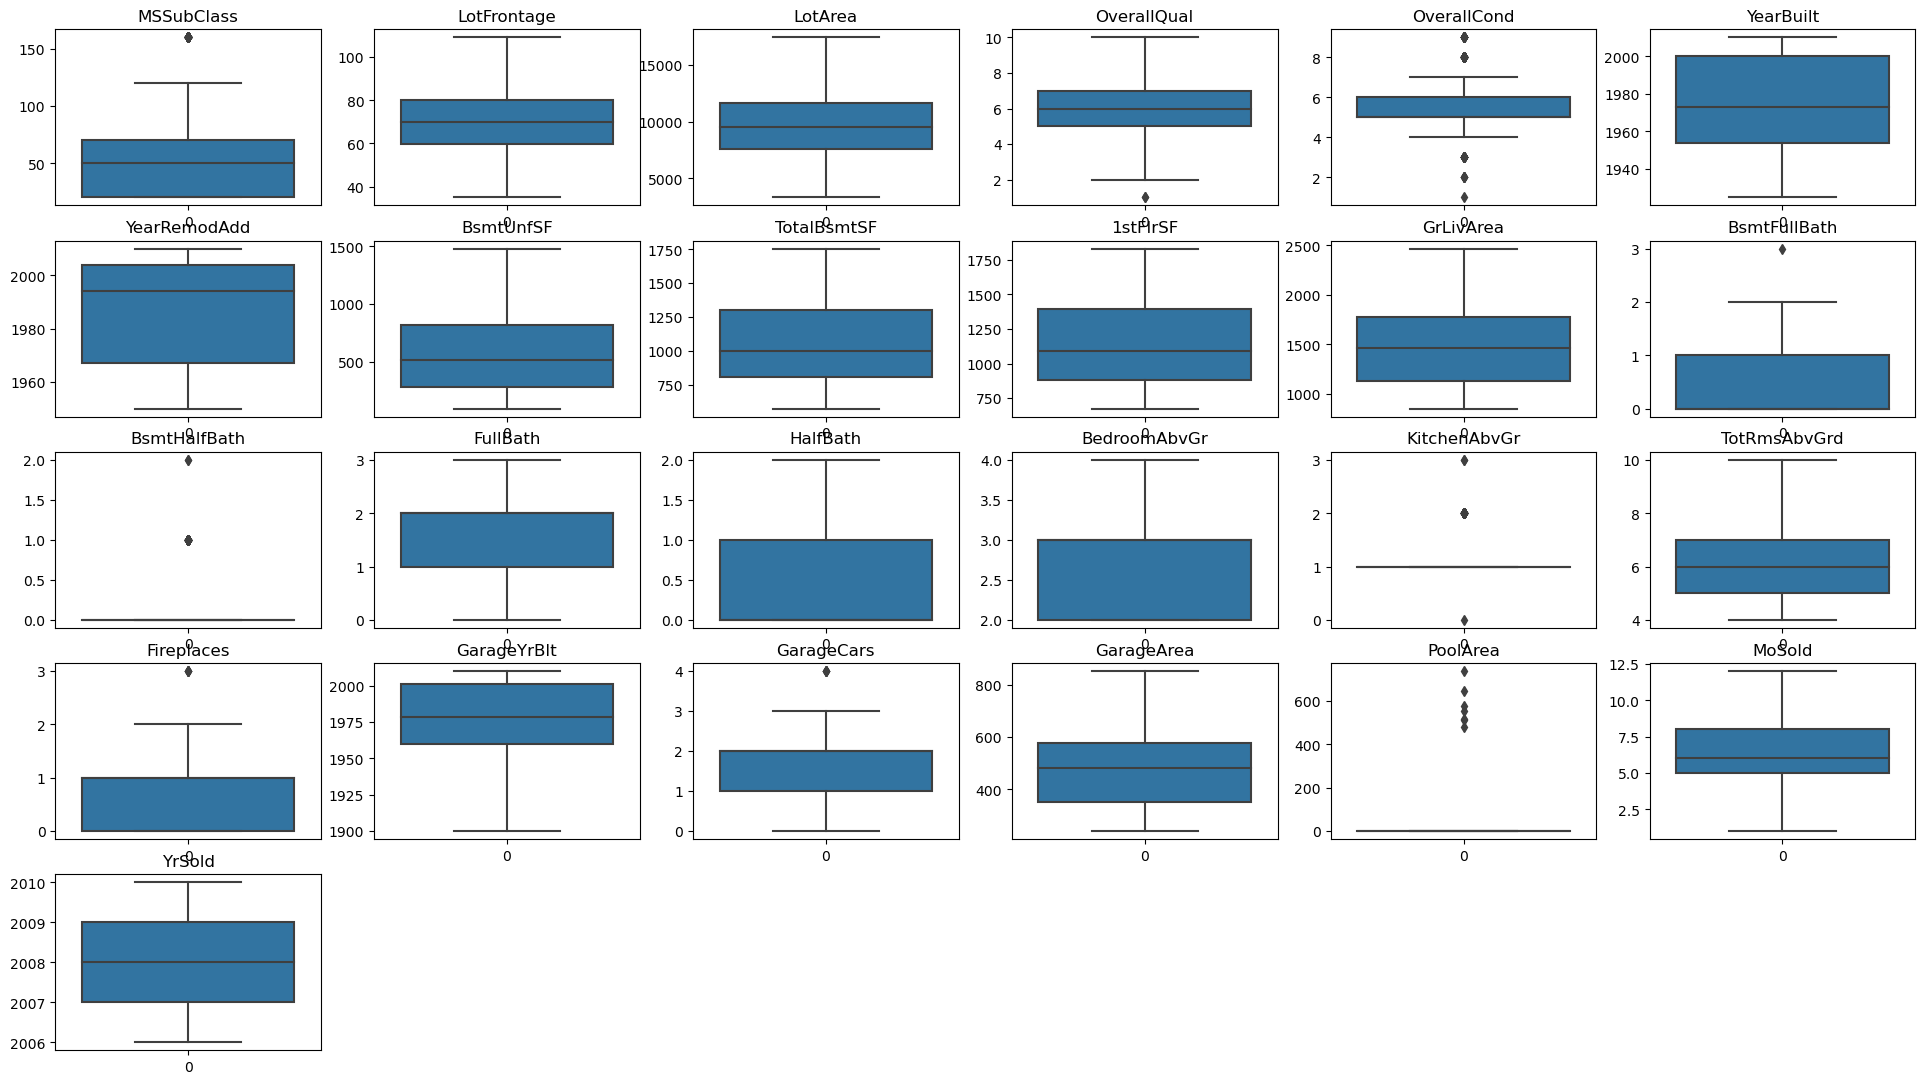

In [31]:
ind = 0
plt.figure(figsize=(24,16))
for i in X[numeric_features]:
    ind += 1
    plt.subplot(6,6,ind)
    plt.title(i)
    sns.boxplot(X[i])

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X[numeric_features] = pd.DataFrame(np.log10(scaler.fit_transform(X[numeric_features])), columns=numeric_features)

/tmp/ipykernel_45845/1260961373.py:4: RuntimeWarning: invalid value encountered in log10
  X[numeric_features] = pd.DataFrame(np.log10(scaler.fit_transform(X[numeric_features])), columns=numeric_features)


In [33]:
def correlation(X, y):
    corr = X[numeric_features].corrwith(y).sort_values(ascending=False).to_frame("Correlation")
    return corr

<Axes: >

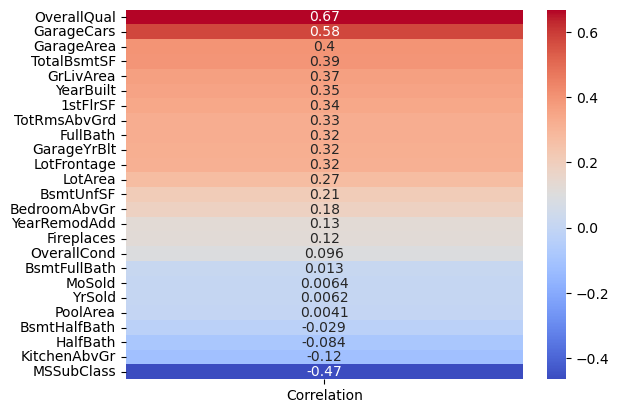

In [34]:
sns.heatmap(correlation(X, y), cmap="coolwarm", annot=True)

In [35]:
X = X.drop(["YrSold","OverallCond","HalfBath","BsmtHalfBath", "BsmtFullBath","MoSold","PoolArea","Heating","Condition2","Utilities", "Street","RoofMatl"], axis=1)

In [36]:
cat_features = [col for col in X.columns if X[col].dtypes == "object" and X[col].nunique() < 10]
other_features = [col for col in X.columns if X[col].dtypes == "object" and X[col].nunique() >= 10]
numeric_features = [col for col in X.columns if X[col].dtypes in ["int64", "float64"]]

In [37]:
# train validation separation
x_trainval, x_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
x_train, x_valid, y_train, y_valid = train_test_split(x_trainval, y_trainval, test_size=0.2, random_state=123)

In [38]:
# forming transformers
cat_transformer = make_pipeline(OneHotEncoder(handle_unknown="ignore"), Normalizer())
other_transformer = make_pipeline(OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1), Normalizer())

In [39]:
# setting all preprocessing steps
preprocessor = ColumnTransformer(transformers=[("categoric",cat_transformer, cat_features), ("others", other_transformer, other_features)])

In [40]:
# model selection
model = RandomForestRegressor()

In [41]:
# Model building
pipe = Pipeline([("preprocessor", preprocessor),("regressor", model)])
pipe.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categoric',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('normalizer',
                                                                   Normalizer())]),
                                                  ['MSZoning', 'LotShape',
                                                   'LandContour', 'LotConfig',
                                                   'LandSlope', 'Condition1',
                                                   'BldgType', 'HouseStyle',
                                                   'RoofStyle', 'MasVnrType',
                                                   'ExterQual', 'ExterCond',
                                                   'Foundation', 'BsmtQual'...
                                                   'KitchenQual', 'Functional',
                                                   'GarageType', 'GarageFinish',
                                                   'GarageQual', 'GarageCond',
                                                   'PavedDrive', 'SaleType',
                                                   'SaleCondition']),
                                                 ('others',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1)),
                                                                  ('normalizer',
                                                                   Normalizer())]),
                                                  ['Id', 'Neighborhood',
                                                   'Exterior1st',
                                                   'Exterior2nd'])])),
                ('regressor', RandomForestRegressor())])

In [42]:
from sklearn.model_selection import GridSearchCV

params = {"regressor__n_estimators":[50,100,150,200],
          "regressor__max_depth":[None, 5, 10], 
          "regressor__min_samples_split":[2,5,10],
          "regressor__min_samples_leaf":[1,2,4],
          "regressor__max_features":["sqrt","log2",None]}

grid_search = GridSearchCV(pipe, params, cv=5, scoring="neg_mean_squared_error")
grid_search.fit(x_valid, y_valid)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('categoric',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore')),
                                                                                         ('normalizer',
                                                                                          Normalizer())]),
                                                                         ['MSZoning',
                                                                          'LotShape',
                                                                          'LandContour',
                                                                          'LotConfig',
                                                                          'LandSlope',
                                                                          'Condition1',
                                                                          'BldgType',
                                                                          'HouseStyle',
                                                                          'RoofStyle',
                                                                          'MasVnrType',
                                                                          'ExterQual',
                                                                          'ExterC...
                                                                                          Normalizer())]),
                                                                         ['Id',
                                                                          'Neighborhood',
                                                                          'Exterior1st',
                                                                          'Exterior2nd'])])),
                                       ('regressor', RandomForestRegressor())]),
             param_grid={'regressor__max_depth': [None, 5, 10],
                         'regressor__max_features': ['sqrt', 'log2', None],
                         'regressor__min_samples_leaf': [1, 2, 4],
                         'regressor__min_samples_split': [2, 5, 10],
                         'regressor__n_estimators': [50, 100, 150, 200]},
             scoring='neg_mean_squared_error')

In [43]:
best_params = grid_search.best_params_
best_params

{'regressor__max_depth': 10,
 'regressor__max_features': 'log2',
 'regressor__min_samples_leaf': 1,
 'regressor__min_samples_split': 2,
 'regressor__n_estimators': 50}

In [44]:
pipe.set_params(regressor__n_estimators=best_params["regressor__n_estimators"],regressor__max_depth=best_params["regressor__max_depth"],regressor__min_samples_split=best_params["regressor__min_samples_split"],regressor__min_samples_leaf=best_params["regressor__min_samples_leaf"],regressor__max_features=best_params["regressor__max_features"])

# model evaluation
prediction = pipe.predict(x_valid)

print("Mean Sqaured Error: ", mean_squared_error(y_valid, prediction))

Mean Sqaured Error:  2169365672.5518394
